<a href="https://colab.research.google.com/github/Shanelynch/Notebooks/blob/main/Final_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import itertools

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Shanelynch/datasets/main/hotel_bookings.csv")

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Text(0, 0.5, 'Canceled')

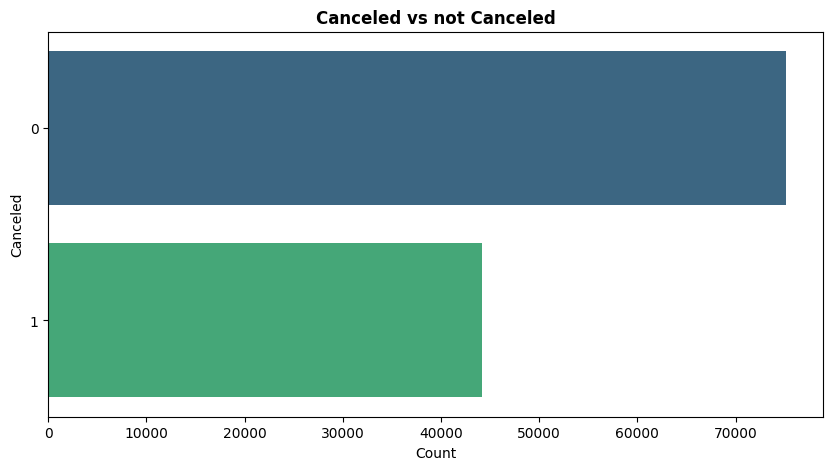

In [ ]:
plt.figure(facecolor='w', figsize = (10,5))
sns.countplot(y = df['is_canceled'], data = df, palette = 'viridis')
plt.title('Canceled vs not Canceled', weight = 'bold')
plt.xlabel('Count')
plt.ylabel('Canceled')

Text(0, 0.5, 'Hotel')

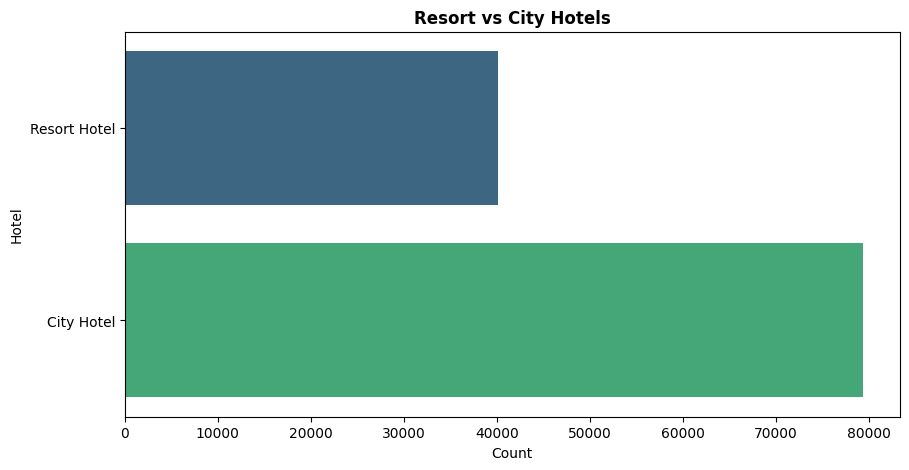

In [ ]:
plt.figure(facecolor='w', figsize = (10,5))
sns.countplot(data = df, y = df['hotel'], palette = 'viridis')
plt.title('Resort vs City Hotels', weight = 'bold')
plt.xlabel('Count')
plt.ylabel('Hotel')

In [ ]:
df['lead_time'] = winsorize(df['lead_time'], (0,0.05))

Text(0, 0.5, 'Lead Time')

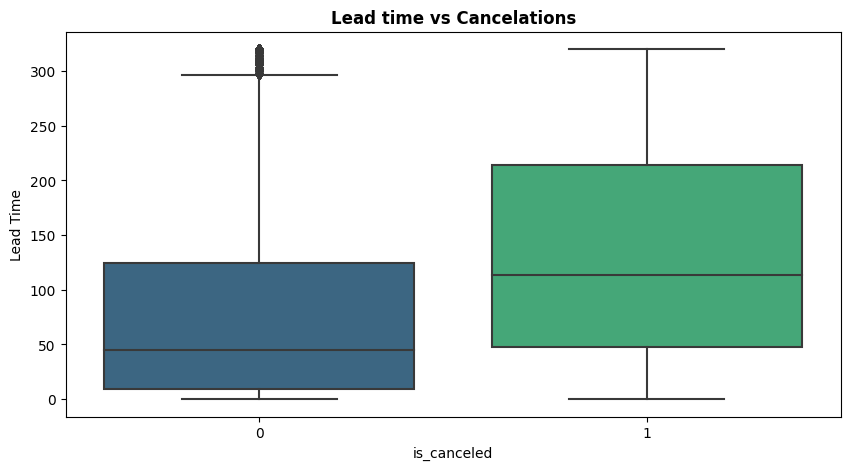

In [ ]:
plt.figure(facecolor='w', figsize = (10,5))
sns.boxplot(data = df, x = df['is_canceled'], y = df['lead_time'], palette = 'viridis')
plt.title('Lead time vs Cancelations', weight = 'bold')
plt.xlabel('is_canceled')
plt.ylabel('Lead Time')



---


**Initial data transformation. Transforming missing country and agent values, dropping the company column, removing rows with zero adults.**

In [ ]:
df['country'] = df['country'].fillna('other')

In [ ]:
df['agent'] = df['agent'].fillna(0)

In [ ]:
df = df[df['adults'] != 0]

In [ ]:
df = df.drop(['company'], axis = 1)



---


**Performing small feature engineering by combining the children and babies columns into one feature because the distinction is unclear. Dropping original columns.**

In [ ]:
df['children_and_babies'] = df['children'] + df['babies']

In [ ]:
df['children_and_babies'] = df['children_and_babies'].fillna(0)

In [ ]:
df = df.drop(['children'], axis = 1)

In [ ]:
df = df.drop(['babies'], axis = 1)



---


**We will now begin to explore the various features of the data to get a better understanding of the many bookings that were recorded in the dataset.**



---


**To be able to properly use the arrival_date_month feature in models later, we need to convert it to a readable form. We will use the map function to fix this.**

In [ ]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January' : 1,
        'February' : 2,
        'March' : 3,
        'April' : 4,
        'May' : 5,
        'June' : 6,
        'July' : 7,
        'August' : 8,
        'September' : 9,
        'October' : 10,
        'November' : 11,
        'December' : 12})

Text(0, 0.5, 'Bookings')

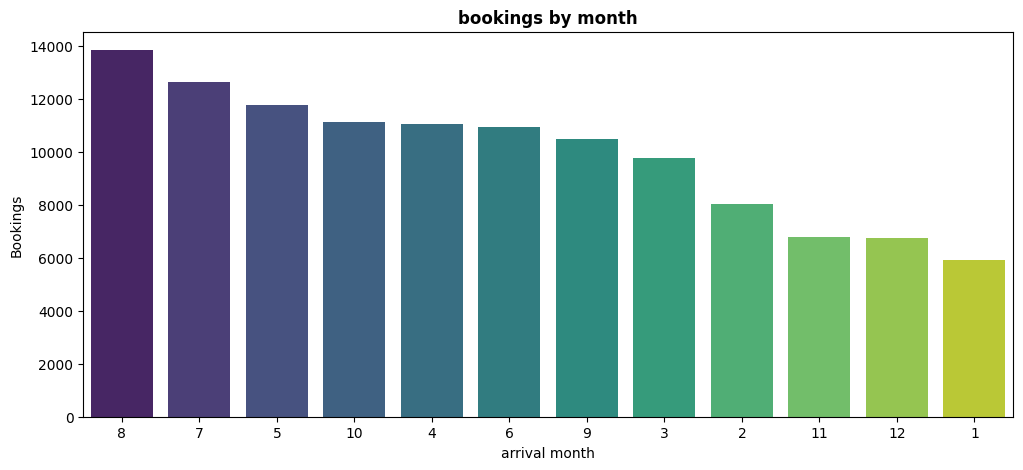

In [ ]:
plt.figure(facecolor='w', figsize = (12,5))
sns.countplot(data = df, x = df['arrival_date_month'], order = pd.value_counts(df['arrival_date_month']).index, palette = 'viridis')
plt.title('bookings by month', weight = 'bold')
plt.xlabel('arrival month')
plt.ylabel('Bookings')

Text(0, 0.5, 'Arivals / Cancelations')

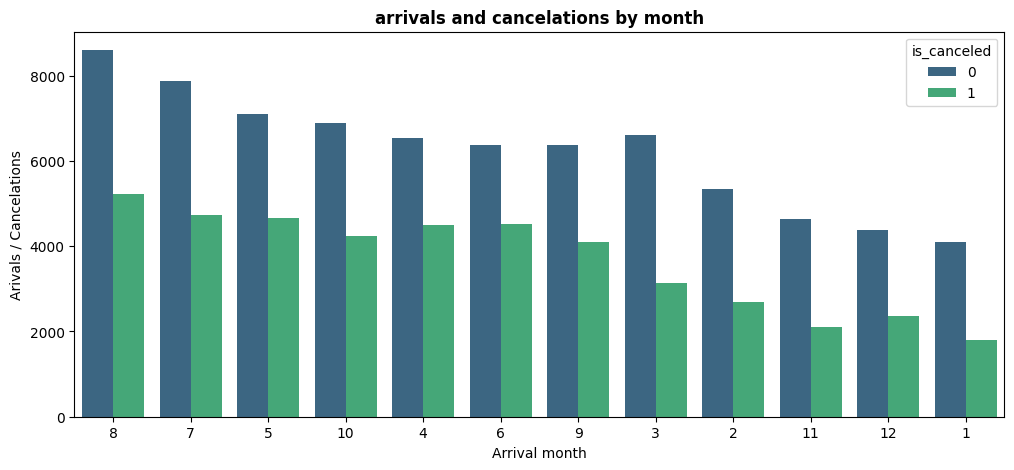

In [ ]:
plt.figure(facecolor='w', figsize = (12,5))
sns.countplot(data = df, x = df['arrival_date_month'], order = pd.value_counts(df['arrival_date_month']).index, hue = df['is_canceled'], palette = 'viridis')
plt.title('arrivals and cancelations by month', weight = 'bold')
plt.xlabel('Arrival month')
plt.ylabel('Arivals / Cancelations')

<ipython-input-24-d9680d382b8a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data = df, x = df['arrival_date_week_number'], y = df['lead_time'], palette = 'viridis')


Text(0, 0.5, 'Lead Time')

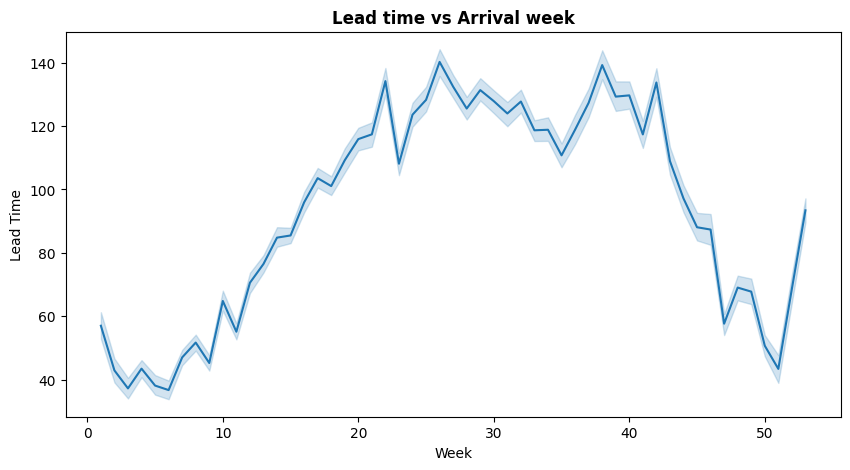

In [ ]:
plt.figure(facecolor='w', figsize = (10,5))
sns.lineplot(data = df, x = df['arrival_date_week_number'], y = df['lead_time'], palette = 'viridis')
plt.title('Lead time vs Arrival week', weight = 'bold')
plt.xlabel('Week')
plt.ylabel('Lead Time')

In [ ]:
df = df[df['adr'] < 5000]

Text(0, 0.5, 'ADR')

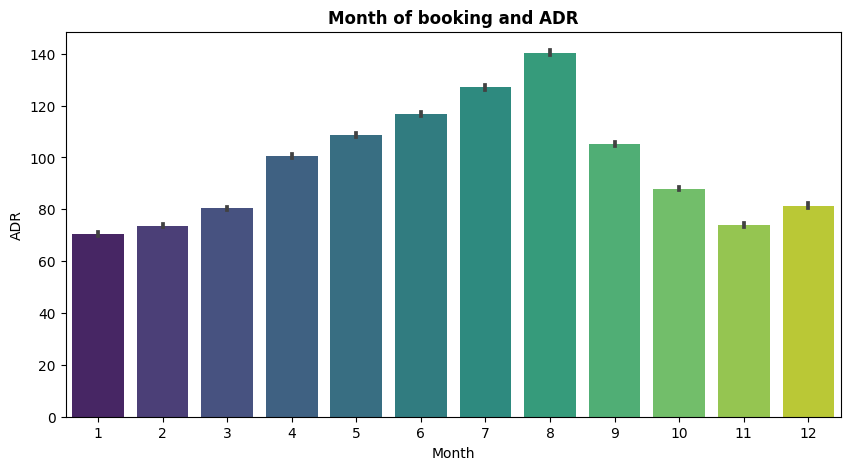

In [ ]:
plt.figure(facecolor='w', figsize = (10,5))
sns.barplot(data = df, x = df['arrival_date_month'], y = df['adr'], palette = 'viridis',)
plt.title('Month of booking and ADR', weight = 'bold')
plt.xlabel('Month')
plt.ylabel('ADR')

Text(0, 0.5, 'Count')

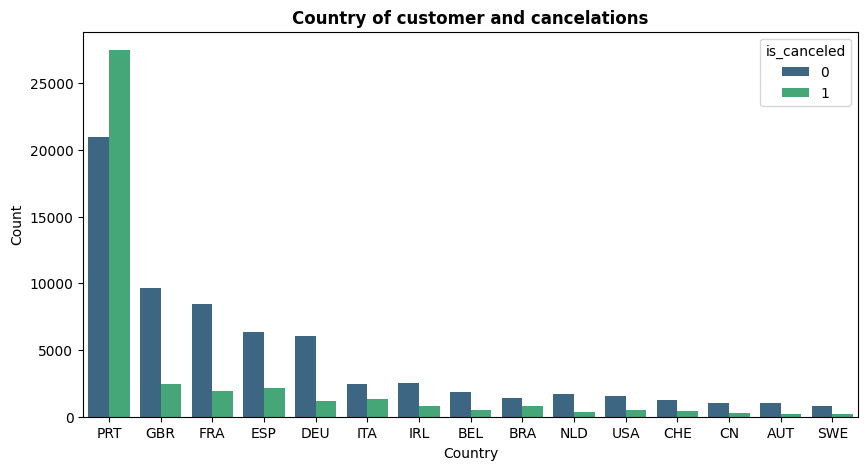

In [ ]:
plt.figure(facecolor='w', figsize = (10,5))
sns.countplot(data = df, x = df['country'], order = pd.value_counts(df['country']).iloc[:15].index, hue = df['is_canceled'], palette = 'viridis')
plt.title('Country of customer and cancelations', weight = 'bold')
plt.xlabel('Country')
plt.ylabel('Count')

Text(0.5, 1.0, 'Percentages of Customer type')

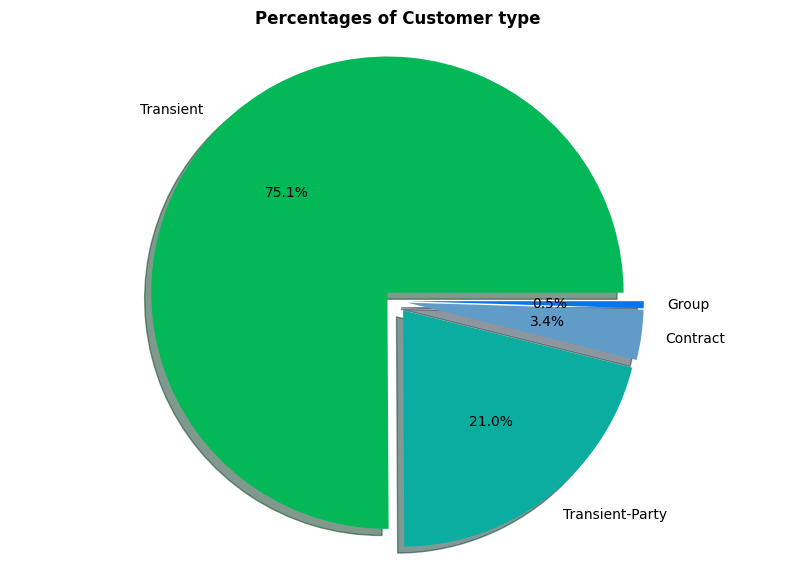

In [ ]:
customer_type_counts = df['customer_type'].value_counts()

plt.figure(facecolor='w', figsize = (10,7))
colors = ['#04b858', '#0aada0', '#619cc9', '#0775eb']
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%',
        colors = colors, explode = explode, shadow=True)
plt.axis('equal')
plt.title('Percentages of Customer type', weight = 'bold')

Text(0, 0.5, 'Count')

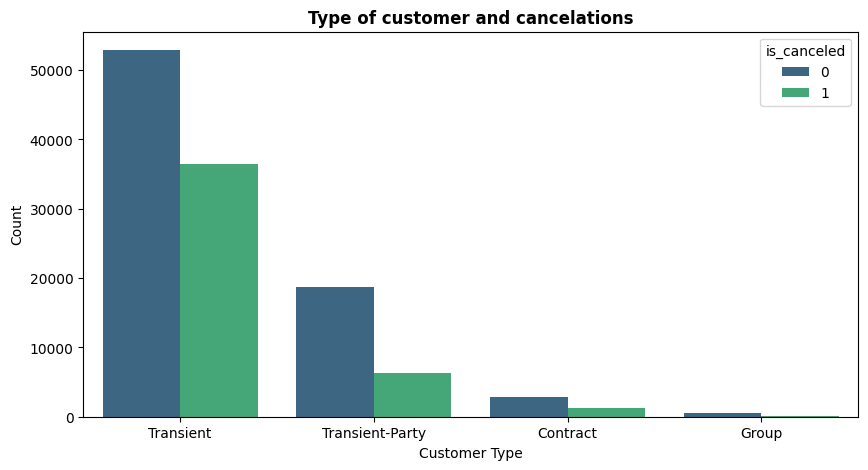

In [ ]:
plt.figure(facecolor='w', figsize = (10,5))
sns.countplot(data = df, x = df['customer_type'], order = pd.value_counts(df['customer_type']).index, hue = df['is_canceled'], palette = 'viridis')
plt.title('Type of customer and cancelations', weight = 'bold')
plt.xlabel('Customer Type')
plt.ylabel('Count')

In [ ]:
pd.crosstab(df['customer_type'], df['market_segment'], margins = True, margins_name = 'Total')

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Total
customer_type,,,,,,,,,
Contract,0,1,22,14,735,1816,1483,0,4071
Group,2,6,28,134,16,210,177,0,573
Transient,216,686,3569,11305,8423,14026,51111,0,89336
Transient-Party,17,31,1663,1100,10617,8126,3450,2,25006
Total,235,724,5282,12553,19791,24178,56221,2,118986


In [ ]:
df = df[df['adults'] < 10]
df = df[df['children_and_babies'] < 8]

pd.crosstab(df['adults'], df['children_and_babies'], margins = True, margins_name = 'Total')

children_and_babies,0.0,1.0,2.0,3.0,Total
adults,,,,,
1,22577,286,157,6,23026
2,81559,4658,3369,91,89677
3,5666,495,41,0,6202
4,59,3,0,0,62
5,2,0,0,0,2
6,1,0,0,0,1
Total,109864,5442,3567,97,118970




---


**A decent amount of the data was not in the correct form to be able to use in models later, so we need to change that by converting each string feature to an integer value by performing label encoding and one hot encoding. We also got rid of the reservation_status feature because it provided the same information that the dependent variable would provide and it would most likely cause issues later.**

In [ ]:
df = df.drop(['arrival_date_year'], axis = 1)

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['reserved_room_type'] = label_encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = label_encoder.fit_transform(df['assigned_room_type'])

df['customer_type'] = label_encoder.fit_transform(df['customer_type'])
df['deposit_type'] = label_encoder.fit_transform(df['deposit_type'])

df['country'] = label_encoder.fit_transform(df['country'])

df['meal'] = label_encoder.fit_transform(df['meal'])
df['market_segment'] = label_encoder.fit_transform(df['market_segment'])
df['distribution_channel'] = label_encoder.fit_transform(df['distribution_channel'])

In [ ]:
one_hot_hotel = pd.get_dummies(df['hotel'])

df = pd.concat([df, one_hot_hotel], axis=1)
df.rename(columns={'0': 'Resort Hotel', '1': 'City Hotel'}, inplace=True)
df = df.drop(['hotel'], axis = 1)

In [ ]:
#df['meal'] = df['meal'].map({'Undefined' : 0, 'SC' : 0, 'BB' : 1, 'HB' : 2, 'FB' : 3})

#df['market_segment'] = df['market_segment'].map({'Undefined' : 0,'Direct' : 1, 'Corporate' : 2, 'Online TA' : 3, 'Offline TA/TO' : 4,
      #'Complementary' : 5, 'Groups' : 6, 'Aviation' : 7})

#df['distribution_channel'] = df['distribution_channel'].map({'Undefined' : 0, 'Direct' : 1, 'Corporate' : 2, 'TA/TO' : 3, 'GDS' : 4})

df = df.drop(['reservation_status_date'], axis = 1)
df = df.drop(['reservation_status'], axis = 1)

<Axes: >

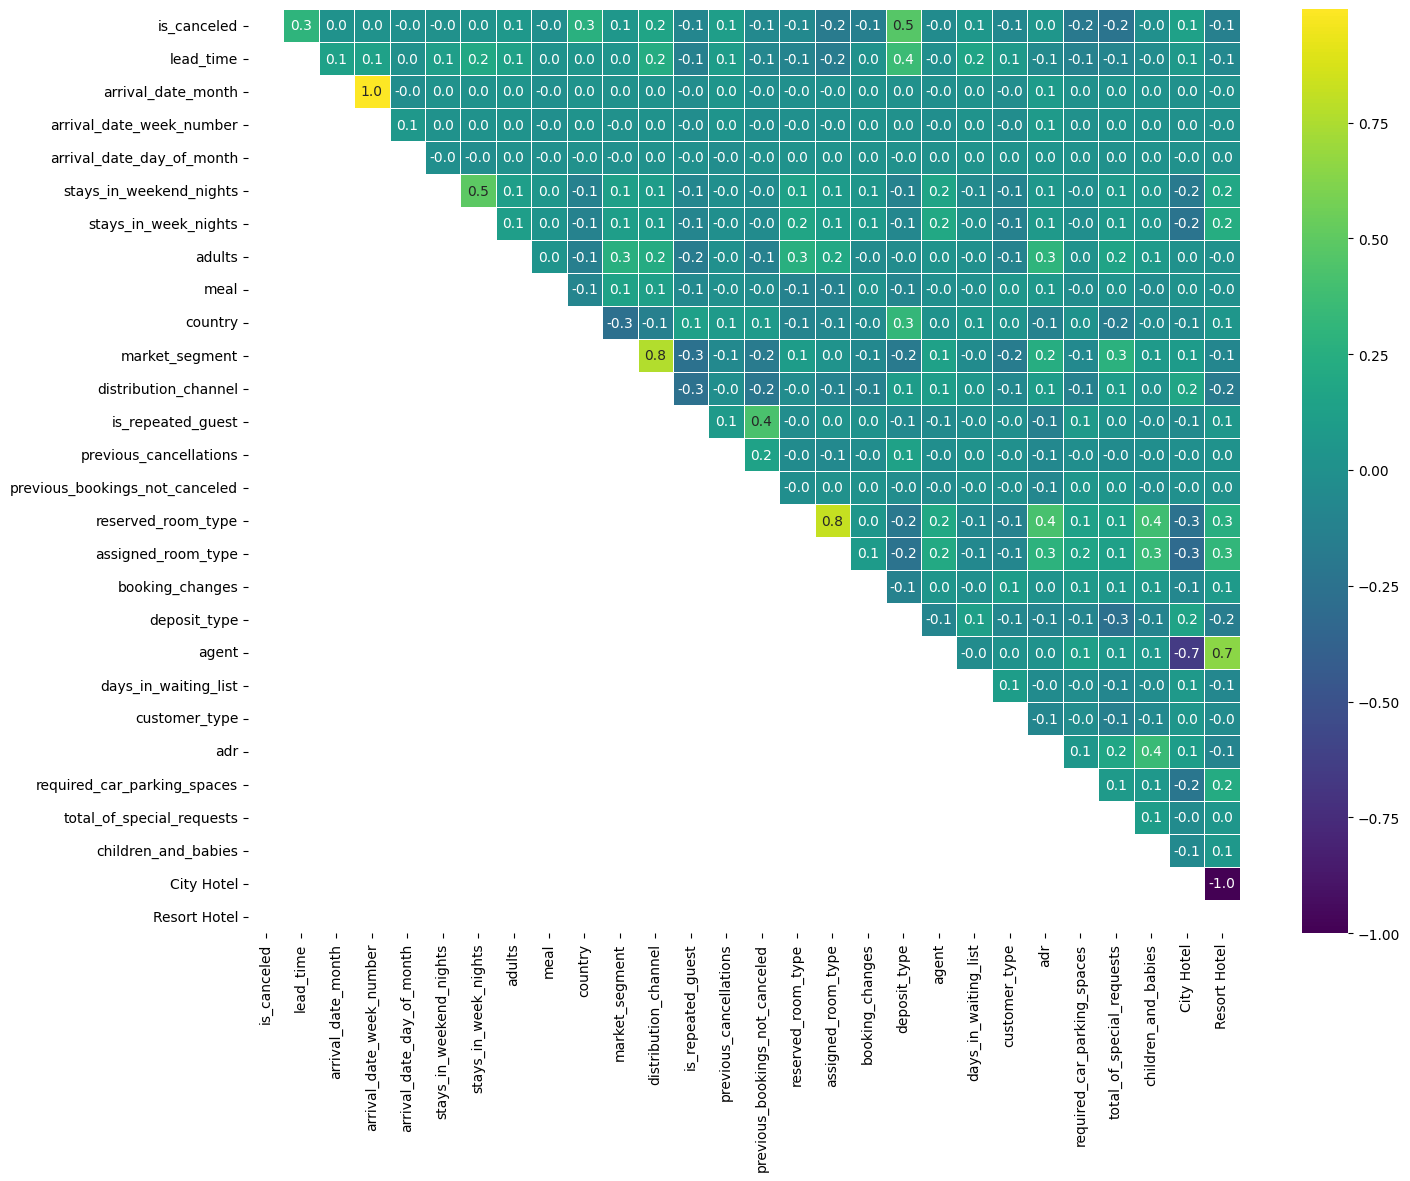

In [ ]:
plt.figure(facecolor='w', figsize = (16,12))
mask = np.tril(df.corr())
sns.heatmap(df.corr(), annot = True, fmt=".1f", linewidth = 0.5, mask = mask, cmap = 'viridis')

<Axes: >

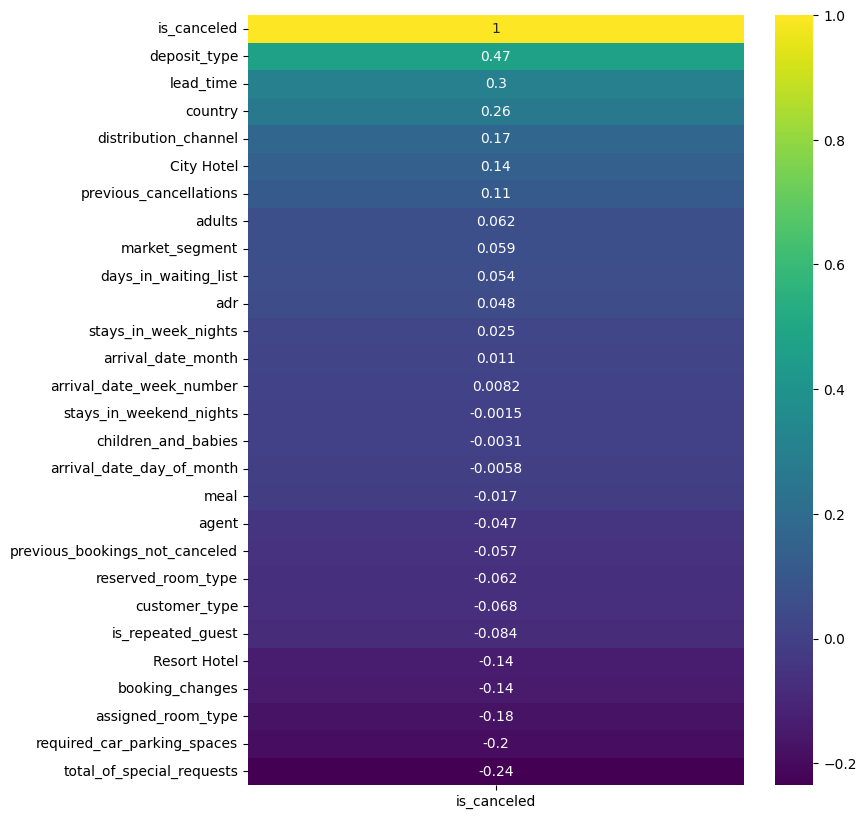

In [ ]:
#display(df.corr().sort_values('is_canceled', ascending=False))
plt.figure(facecolor='w', figsize = (8,10))
correlation = df.corr().sort_values('is_canceled', ascending=False)[['is_canceled']]
sns.heatmap(correlation, cmap = "viridis", annot=True)



---



**Fianlly, we will run our models against the data. For this project i have chosen Logistic regression, Random forest, and Gradient boosting**

In [ ]:
new_frame = df.drop(['is_canceled', 'country'], axis = 1)

target = df.is_canceled

In [ ]:
#scaler = StandardScaler()
#X_std = scaler.fit_transform(new_frame)

In [ ]:
new_frame.describe()

,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,distribution_channel,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,children_and_babies,City Hotel,Resort Hotel
count,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,...,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000,118970.000000
mean,100.389308,6.552055,27.163033,15.797226,0.926856,2.498857,1.859713,0.554879,4.927957,2.585795,...,0.125326,75.018215,2.325897,2.137051,101.974635,0.062663,0.570707,0.108153,0.663503,0.336497
std,96.567864,3.089356,13.598890,8.781266,0.995242,1.897637,0.477878,1.067572,1.265639,0.907218,...,0.335177,107.236255,17.615434,0.577016,48.045446,0.245561,0.792428,0.401639,0.472513,0.472513
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,4.000000,3.000000,...,0.000000,7.000000,0.000000,2.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,5.000000,3.000000,...,0.000000,9.000000,0.000000,2.000000,95.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,160.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,6.000000,3.000000,...,0.000000,154.000000,0.000000,2.000000,126.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,320.000000,12.000000,53.000000,31.000000,19.000000,50.000000,6.000000,4.000000,7.000000,4.000000,...,2.000000,535.000000,391.000000,3.000000,510.000000,8.000000,5.000000,3.000000,1.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_frame, target, random_state = 25)

In [ ]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter = 10000)
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

print('accuracy score: %s' % lr.score(X_test, y_test))
print('# of iterations %s' % lr.n_iter_[0])

f1_lr = f1_score(y_test, predictions)
print("Logistic Regression F1 score:", f1_lr)


accuracy score: 0.8026090172477558
# of iterations 4010
Logistic Regression F1 score: 0.6787414500683995


Confusion matrix, without normalization


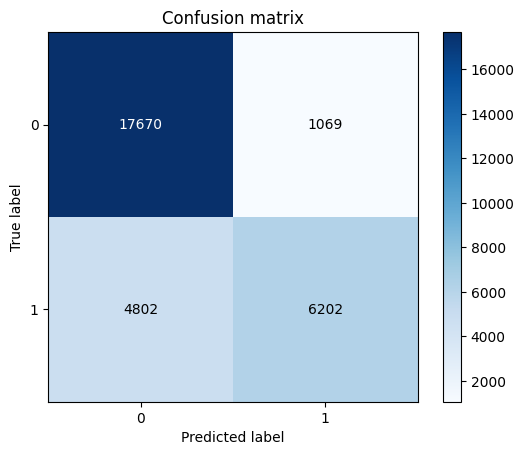

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm,[0,1],False)

In [ ]:
rf = RandomForestClassifier(max_depth = 30, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 400)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

f1_rf = f1_score(y_test, y_pred)
print("Random forest F1 score:", f1_rf)


Random forest F1 score: 0.8147967638171363


Confusion matrix, without normalization


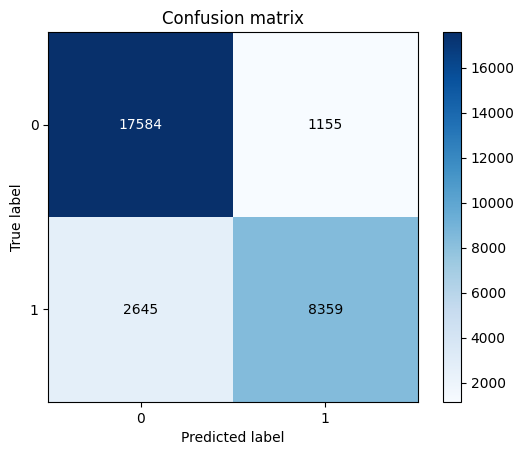

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,[0,1],False)

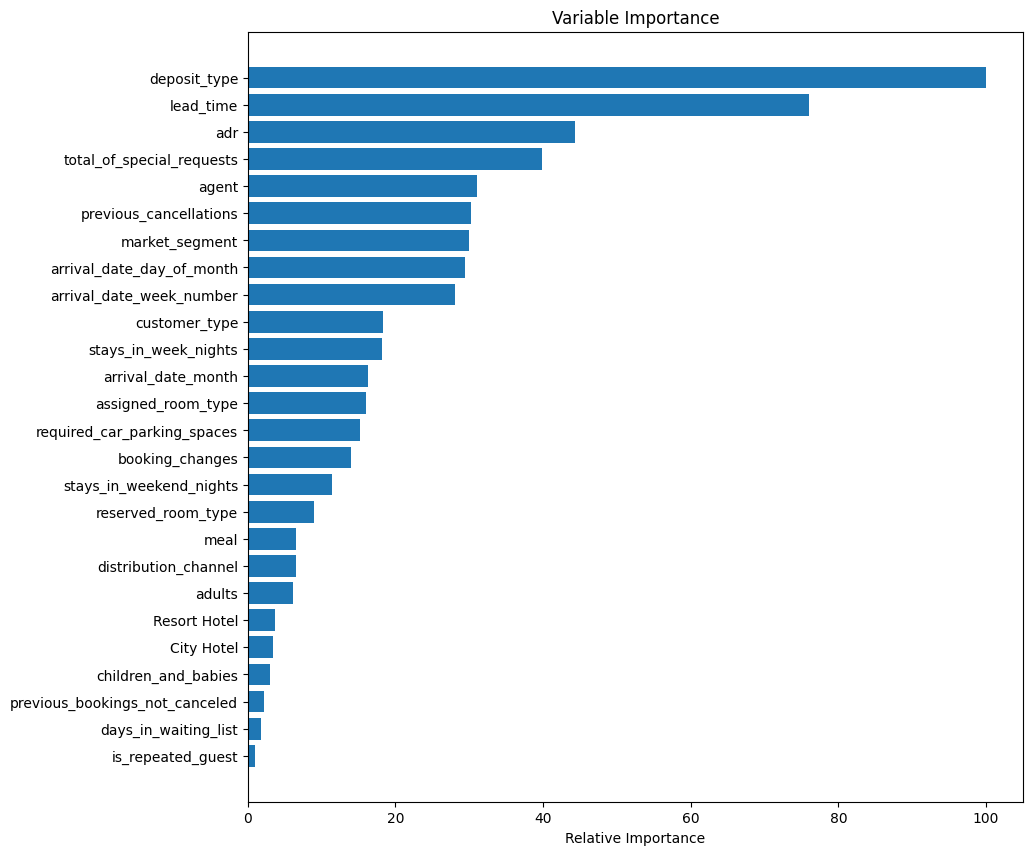

In [ ]:
feature_importance = rf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(facecolor='w', figsize = (10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, new_frame.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
clf = GradientBoostingClassifier(random_state = 42, learning_rate = 0.1, n_estimators = 300, max_depth = 6)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

print('accuracy score: %s' % clf.score(X_test, y_test))

f1_clf = f1_score(y_test, predict_test)
print("Gradient boost F1 score:", f1_clf)


accuracy score: 0.8597989442894126
Gradient boost F1 score: 0.7945407962160032


Confusion matrix, without normalization


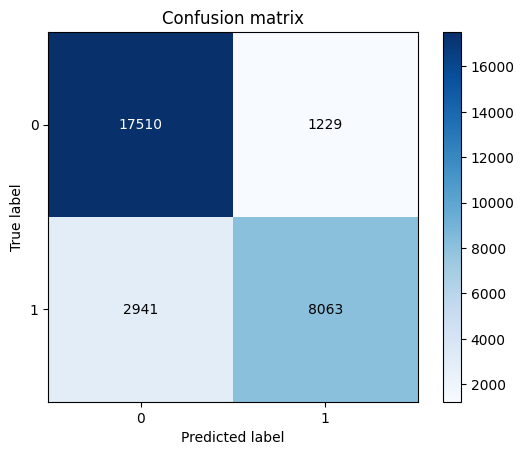

In [ ]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

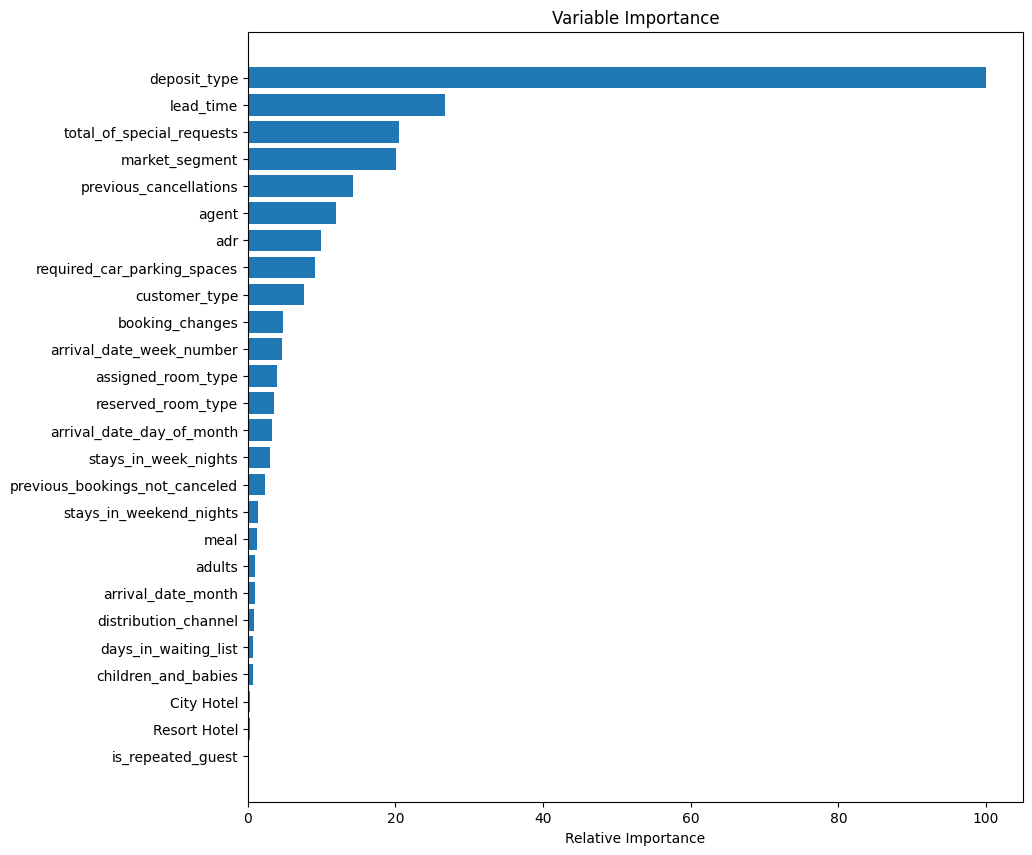

In [ ]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(facecolor='w', figsize = (10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, new_frame.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()



---
**As we can see from the models, Random forest has produced the highest results.**

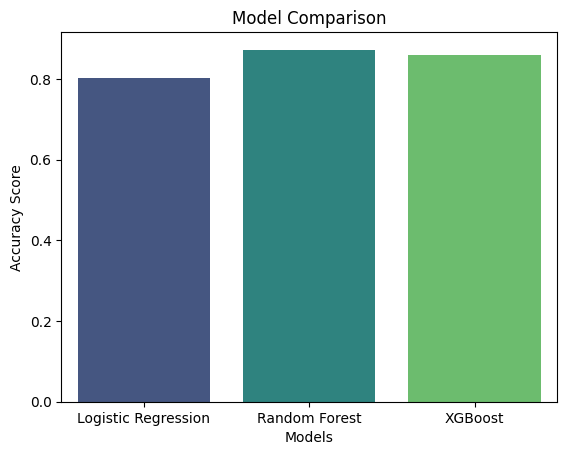

In [ ]:
models = [lr, rf, clf]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']

# create an empty list to store the accuracy scores for each model
scores = []

# calculate the accuracy score for each model
for model in models:
    scores.append(model.score(X_test, y_test))

# create a barplot to compare the accuracy scores of each model
sns.barplot(x=model_names, y=scores, palette = 'viridis')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

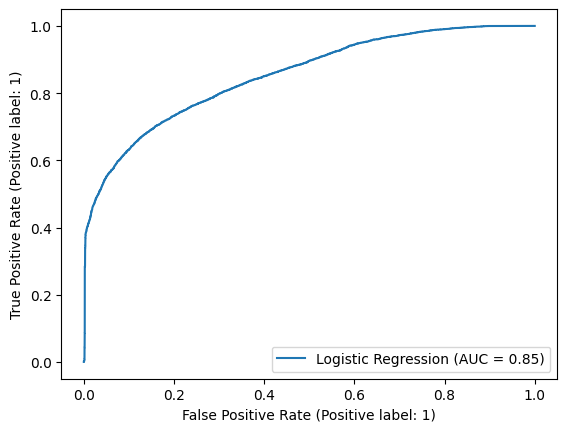

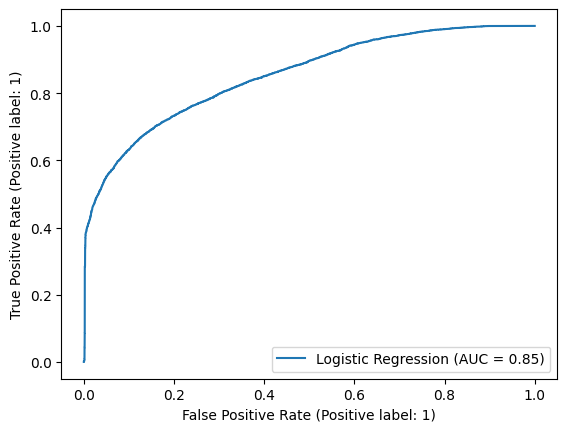

In [ ]:
display = RocCurveDisplay.from_estimator(lr, X_test, y_test, name='Logistic Regression')
display.plot()
plt.show()

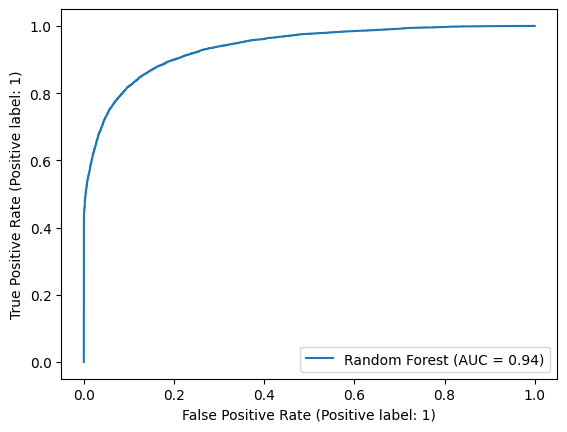

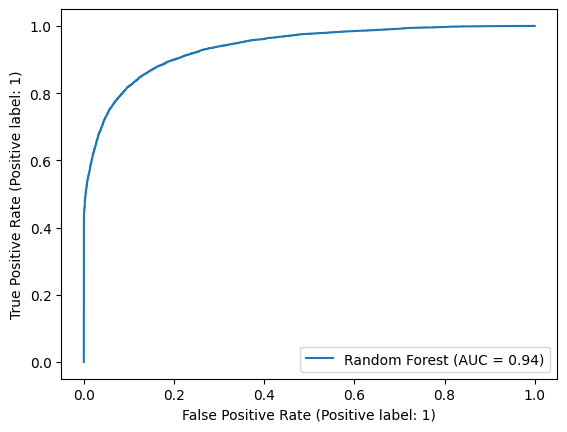

In [ ]:
display = RocCurveDisplay.from_estimator(rf, X_test, y_test, name='Random Forest')
display.plot()
plt.show()

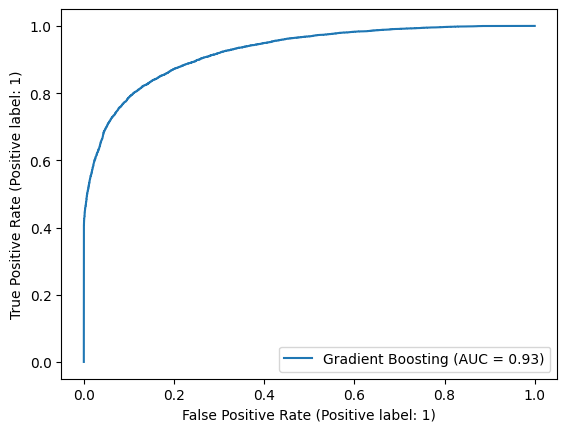

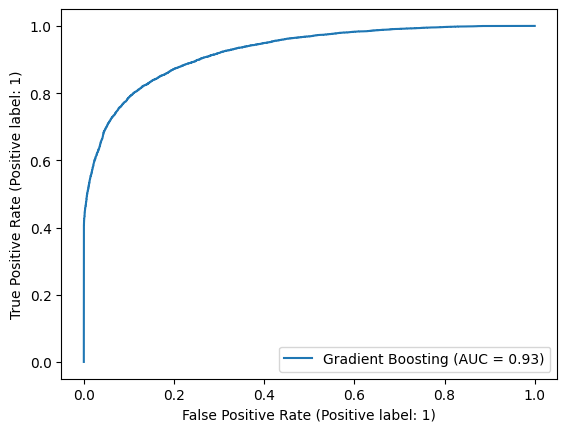

In [ ]:
display = RocCurveDisplay.from_estimator(clf, X_test, y_test, name='Gradient Boosting')
display.plot()
plt.show()